## Задача регрессии, линейная модель прогнозирования

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

В этом задании мы будем искать, как параметры квартиры влияют на цену квартиры в Бостоне

Делать это будем с помощью обучения линейной регрессии

Но для начала, чуть подробнее посмотрим, что такое линейная регрессия.

Создадим два массива, один с ростом человека, другой с весом.

In [ ]:
# Создаем выборку
x = np.array([70, 75, 81]) # вес человека
y_true = np.array([170, 180, 190]) # предсказывать будем рост

Предполагается что человек весом 70кг имеет рост 170см. и т.д.

In [ ]:
y_true

array([170, 180, 190])

Предположим наш алгоритм как то обучился и мы получили ` w = 3`  

In [ ]:
weight = 3

Функция потерь

In [ ]:
(70 * 3 - 170) ** 2

1600

Посмотрим, что предскажет наш алгоритм для первого элемента исходных данных

In [ ]:
x[0] * weight # Ответ нашего алгоритма

210

In [ ]:
def mse(x, y, w):
    return ((x * w - y)**2).mean()

In [ ]:
mse(x, y_true, weight)

2144.6666666666665

In [ ]:
mse(x, y_true, 2)

861.3333333333334

In [ ]:
mse(x, y_true, 2.38)

7.1794666666666815

Напишите фунцию потерь на основе формулы и приведите ее к минимуму изменяя `weight`

Данные: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [ ]:
from sklearn.datasets import load_boston

boston_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
type(boston_data)

sklearn.utils.Bunch

In [ ]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
X = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y = boston_data['target']
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

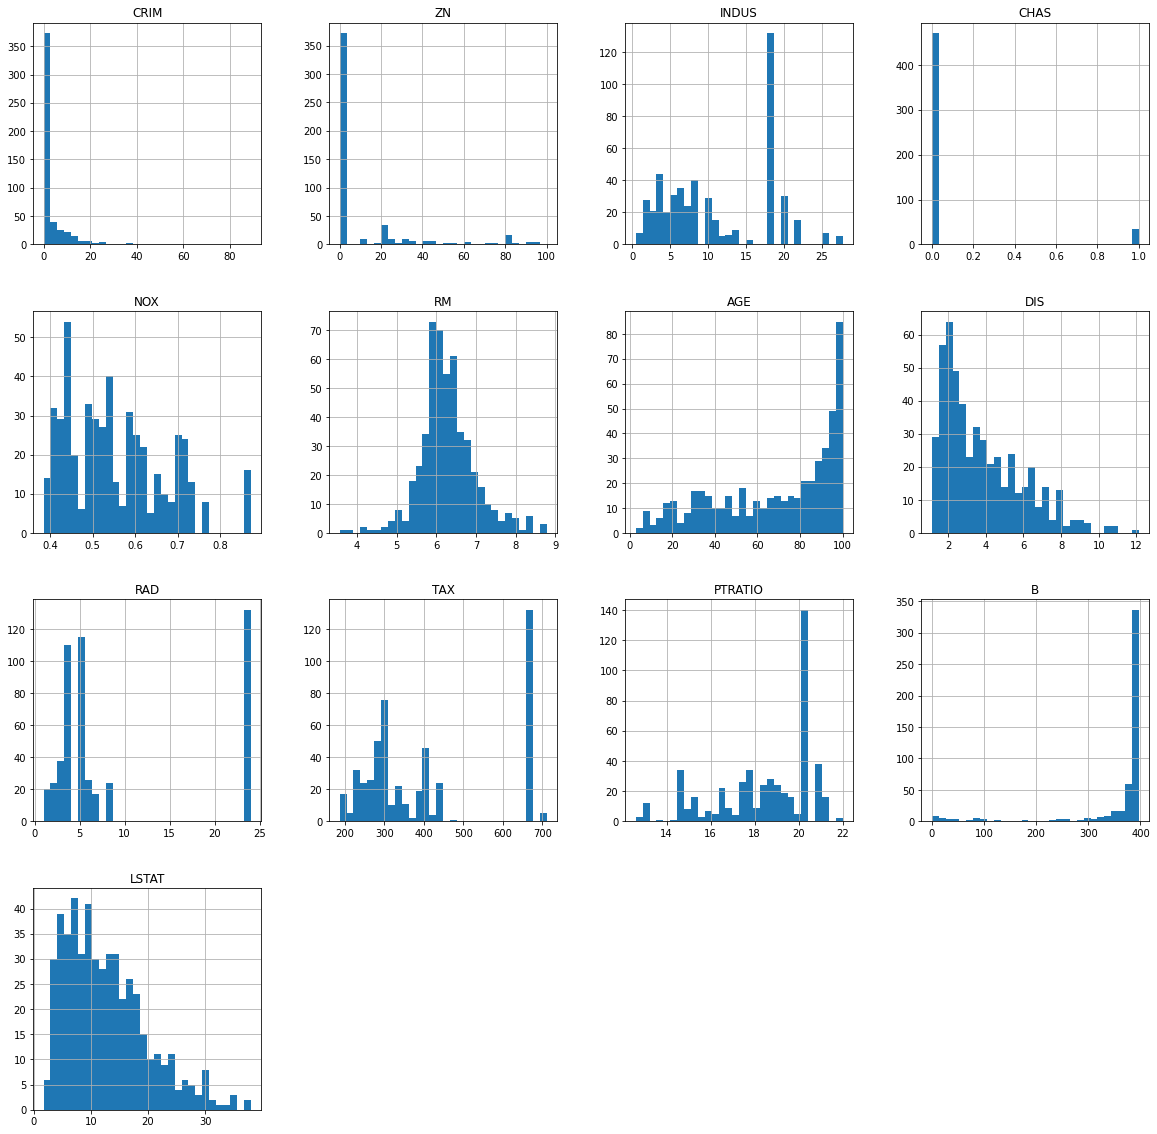

In [ ]:
_ = X.hist(X.columns, bins=30, figsize=(20, 20))

# Описание признаков:
- **CRIM** - per capita crime rate by town - уровень преступности на душу населения в районе объекта недвижимости
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft. - число жилых участков площадью свыше 25 000 кв.фут.
- **INDUS** - proportion of non-retail business acres per town - доля акров не розничного бизнеса в районе
- **NOX** - nitric oxides concentration (parts per 10 million) -  концентрация оксидов азота NOX (частей на 10 млн.)
- **RM** - average number of rooms per dwelling - среднее количество комнат в одном жилом помещении
- **AGE** - proportion of owner-occupied units built prior to 1940 - доля зданий в районе, построенных до 1940 года
- **DIS** - weighted distances to five Boston employment centres - взвешенные расстояния до пяти бостонских центров занятости
- **RAD** - index of accessibility to radial highways - индекс доступности к радиальным магистралям
- **TAX** - full-value property-tax rate per $ \$10,000$ - ставка налога на недвижимость за каждые $\$10,000$ стоимости недвижимости
- **PTRATIO** - число учеников в школах на одного школьного учителя
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town - число, показывающее число
- **LSTAT** - % lower status of the population - какую долю населения района составляют люди из бедного класса

**RENT_PRICE** - стоимость аренды объекта жилья в месяц. Это целевое значение, которое хотим научиться хорошо предсказывать.

Выделите значения признака ```RM``` в отдельный numpy-array с названием ```x_data```

In [ ]:
x_data = X['RM'].values # создание numpy массива, для того чтобы векторно выполнять расчеты.
x_data

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [ ]:
type(x_data)

numpy.ndarray

Постройте scatter-plot зависимости цены квартиры от количества комнат в квартире.

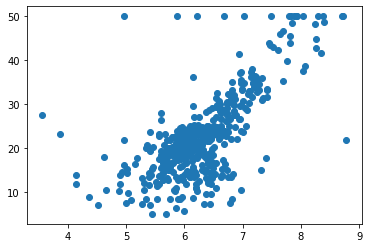

In [ ]:
plt.scatter(x_data, y)

Видим линейную корреляцию признака ```RM``` и таргета

In [ ]:
x_data = x_data.reshape((-1, 1))
x_data

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [ ]:
x_data.shape

(506, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
# Имеено тут находится всё машинное обучение
# Обучаем модель
reg.fit(x_data, y) # признаки и правильные ответы и как то определяет веса

# Делаем предсказания
y_pred = reg.predict(x_data) # Получаем вектор numpy с предсказанием правильного ответа

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y, y_pred) # Верные ответы и наши предсказания

43.60055177116956

In [ ]:
reg.coef_  # Веса нашей модели

array([9.10210898])

In [ ]:
x
y_true

array([170, 180, 190])

In [ ]:
x * weight

array([210, 225, 243])

In [ ]:
x_features = np.array([1, 2, 3, 5])

In [ ]:
weights = np.array([2, 3, 4, 5])

In [ ]:
x_features @ weights

45

Построим график обученной прямой

Coefficients: 
 [9.10210898]
Mean squared error: 43.60
Coefficient of determination: 0.48


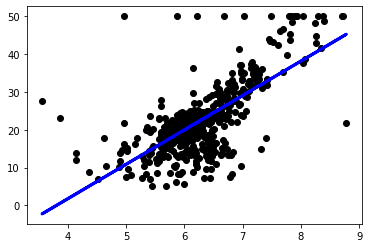

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients: \n', reg.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

plt.scatter(x_data, y,  color='black')
plt.plot(x_data, y_pred, color='blue', linewidth=3)

plt.show()

Теперь обучим модель на всех признаках

Для начала нужно разбить выборку на обучающую и тестовую.

Качество модели нужно оценивать по выборке, которая не участвовала в обучении.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, test_size=0.3, random_state=42)

Линейные модели очень чувствительны к нормировке данных

Давайте отнормируем признаки

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[:] = scaler.fit_transform(X_train)
X_test[:] = scaler.transform(X_test)

In [ ]:
X[:] = scaler.fit_transform(X)

###  Обучим линейную регрессию

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("MSE error:\t{}".format(mean_squared_error(y_test, y_pred)))

MSE error:	21.517444231177212


Чтобы понять, какой вклад делают отдельные признаки в целевую переменную, можно посмотреть на коэффициенты обученной линейной модели

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


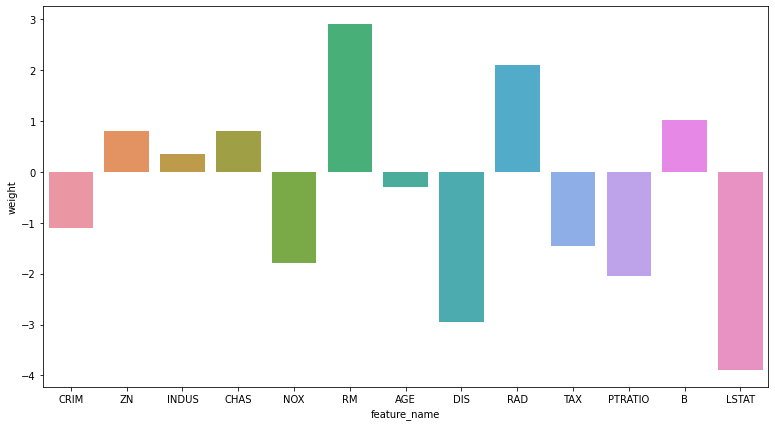

In [ ]:
def plot_bar(coefs, names):
    assert coefs.shape[0] == len(names)#ошибка если не true
    weights_df = pd.DataFrame(zip(coefs, names),
                              columns=['weight', 'feature_name'])
    fig, ax = plt.subplots(figsize=(weights_df.shape[0] * 1, 7))
    sns.barplot(ax=ax, x="feature_name", y="weight", data=weights_df)
    return weights_df

weights_df = plot_bar(lr.coef_, X.columns)

In [ ]:
lr.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

Мы получили веса каждого признака - это те числа, с которыми признаки умножаются и складываются, чтобы получить прогноз.

Знак найденных весов говорит об эффекте влияния признака на целевую переменную.

Например, чем больше значение признака ```NOX``` (концентрация оксидов серы в воздухе), тем ниже цена на жилье в этом районе.

Величина веса показывает его важность относительно других признаков

**Как проинтерпретировать полученные важности признаков?**

# Метрики в задаче регрессии

## Стандартные метрики регрессии

- Общая концепция - $\frac1n \sum\limits_{i=1}^n L(a(x_i), y_i)$

-  MAE - Mean Absolute Error - $\frac1n \sum\limits_{i=1}^n |a(x_i) - y_i|$

- MSE - Mean Squared Error - $\frac1n \sum\limits_{i=1}^n (a(x_i) - y_i)^2$

- MAPE - Mean Absolute Percentage Error - $\frac1n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{y_i}$

- sMAPE - symmetric Mean Absolute Percentage Error - $\frac2n \sum\limits_{i=1}^n \frac{|a(x_i) - y_i|}{a(x_i) + y_i}$

### Несколько свойств оптимизации метрик регрессии

- $\sum\limits_{i=1}^n \left(a(x_i) - y_i\right)^2 \to \min \implies a(x_i) \approx E(y \mid x = x_i)$

- $\sum\limits_{i=1}^n \left|~a(x_i) - y_i~\right| \to \min \implies a(x_i) \approx median(y \mid x = x_i)$

Давайте теперь реализуем эти метрики с помощью Numpy

In [ ]:
y_true = np.array([4, 5, 8])

y_pred_fst = np.array([4.5, 5.3, 7.4])

y_pred_snd = np.array([4.1, 4.9, 11.5])

In [ ]:
def MSE(y_true, y_pred):
    return np.power(y_true - y_pred, 2).mean()

In [ ]:
def MAE(y_true, y_pred):
    return np.absolute(y_true - y_pred).mean()

In [ ]:
def MAPE(y_true, y_pred):
    return (np.absolute(y_true - y_pred)/y_true).mean()

In [ ]:
MSE(y_true, y_pred_fst)

0.23333333333333317

In [ ]:
MSE(y_true, y_pred_snd)

4.09

In [ ]:
MAE(y_true, y_pred_fst)

0.4666666666666665

In [ ]:
MAE(y_true, y_pred_snd)

1.2333333333333332

In [ ]:
MAPE(y_true, y_pred_fst)

0.08666666666666663

In [ ]:
MAPE(y_true, y_pred_snd)

0.16083333333333327

## Устойчивость метрик к выбросам

Сгенерируем датасет из 500 точек на плоскости, для которых $y = 0.5x +1+ \epsilon$ ",где $\epsilon$ распределено нормально с матожиданием 0 и дисперсией 0.2.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
mu, sigma = 0, 0.2
n = 500

In [ ]:
x = np.linspace(0, 10, n)

In [ ]:
# f(x) = 0.5x+1+epsilon,   epsilon in N(mu, sigma)
def f(x):
    random = np.random.normal(mu, sigma, n)
    return 0.5 * x + 1 + random

1) Визуализируем выборку

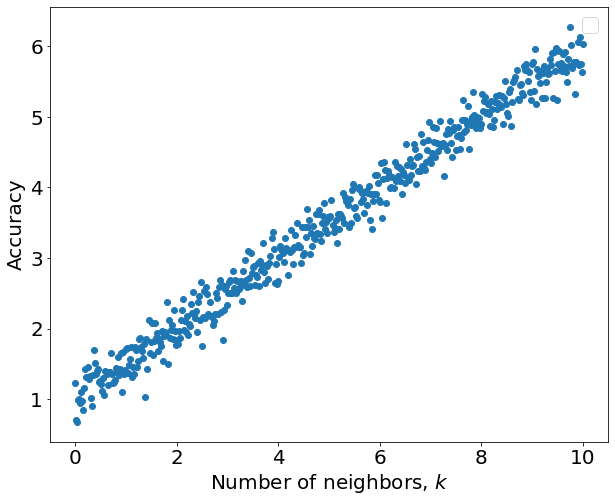

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x, f(x))
plt.xlabel(r"Number of neighbors, $k$", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

2) Восстановите по выборке зависимость $y(x)$, считая, что зависимость имеет вид $y = kx+b$, и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize. Визуализируйте восстановленную прямую.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
x

array([ 0.        ,  0.02004008,  0.04008016,  0.06012024,  0.08016032,
        0.1002004 ,  0.12024048,  0.14028056,  0.16032064,  0.18036072,
        0.2004008 ,  0.22044088,  0.24048096,  0.26052104,  0.28056112,
        0.3006012 ,  0.32064128,  0.34068136,  0.36072144,  0.38076152,
        0.4008016 ,  0.42084168,  0.44088176,  0.46092184,  0.48096192,
        0.501002  ,  0.52104208,  0.54108216,  0.56112224,  0.58116232,
        0.6012024 ,  0.62124248,  0.64128257,  0.66132265,  0.68136273,
        0.70140281,  0.72144289,  0.74148297,  0.76152305,  0.78156313,
        0.80160321,  0.82164329,  0.84168337,  0.86172345,  0.88176353,
        0.90180361,  0.92184369,  0.94188377,  0.96192385,  0.98196393,
        1.00200401,  1.02204409,  1.04208417,  1.06212425,  1.08216433,
        1.10220441,  1.12224449,  1.14228457,  1.16232465,  1.18236473,
        1.20240481,  1.22244489,  1.24248497,  1.26252505,  1.28256513,
        1.30260521,  1.32264529,  1.34268537,  1.36272545,  1.38

In [ ]:
np.array(list(zip(x, np.ones(n))))

array([[ 0.        ,  1.        ],
       [ 0.02004008,  1.        ],
       [ 0.04008016,  1.        ],
       [ 0.06012024,  1.        ],
       [ 0.08016032,  1.        ],
       [ 0.1002004 ,  1.        ],
       [ 0.12024048,  1.        ],
       [ 0.14028056,  1.        ],
       [ 0.16032064,  1.        ],
       [ 0.18036072,  1.        ],
       [ 0.2004008 ,  1.        ],
       [ 0.22044088,  1.        ],
       [ 0.24048096,  1.        ],
       [ 0.26052104,  1.        ],
       [ 0.28056112,  1.        ],
       [ 0.3006012 ,  1.        ],
       [ 0.32064128,  1.        ],
       [ 0.34068136,  1.        ],
       [ 0.36072144,  1.        ],
       [ 0.38076152,  1.        ],
       [ 0.4008016 ,  1.        ],
       [ 0.42084168,  1.        ],
       [ 0.44088176,  1.        ],
       [ 0.46092184,  1.        ],
       [ 0.48096192,  1.        ],
       [ 0.501002  ,  1.        ],
       [ 0.52104208,  1.        ],
       [ 0.54108216,  1.        ],
       [ 0.56112224,

In [ ]:
# Созданим матрицу A для MSE оптимизации
# Мы предположили что наша фунция в данном случае y=kx+b
A = np.array(list(zip(x, np.ones(n))))
y = f(x)

def MSE_of_linear_func(x):
    return mean_squared_error(A.dot(x), y)

In [ ]:
from scipy.optimize import minimize
x0 = [0, 0]
res1 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization gives k_1 = {} and b_1 = {}".format(res1.x[0], res1.x[1]))

MSE optimization gives k_1 = 0.501736961168903 and b_1 = 0.98798174502213




```
# This is formatted as code
```

Как работает метод оптимизации `Nelder-Mean` - процесс оптимизации похож на то, как амеба скатывается в самую глубокую часть ямы

![](https://www.jakubkonka.com/images/nelder-mead/one-minimum.gif)

Часто функции оптимизируют с помощью метода градиентного спуска

![](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)

In [ ]:
x[2]

0.04008016032064128

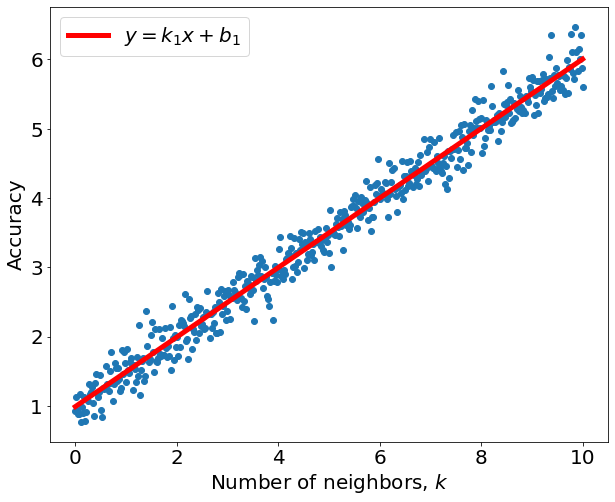

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, res1.x[0]*x+res1.x[1], c = 'r', linewidth=5, label=r"$ y = k_{1}x+b_{1}$")

plt.xlabel(r"Number of neighbors, $k$", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

Добавим в выборку 75 точек, для которых $y = -1+\epsilon$, а $x$ принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По новой расширенной выборке снова попробуйте восстановить зависимость $y(x)=kx+b$ двумя способами: минимизируя MSE и минимизируя MAE.

Визуализируйте полученные прямые.

In [ ]:
x_new = np.concatenate((x,np.linspace(0,10,75)), axis = 0)
print(x_new.shape)

(575,)


In [ ]:
y1 = -1 + np.random.normal(mu, sigma, 75)
y_new = np.concatenate((y,y1), axis = 0)

In [ ]:
from sklearn.metrics import mean_absolute_error
A_new = np.array(list(zip(x_new, np.ones(575))))

def MSE_of_linear_func(x):
    return mean_squared_error(A_new.dot(x), y_new)

def MAE_of_linear_func(x):
    return mean_absolute_error(A_new.dot(x), y_new)

In [ ]:
from scipy.optimize import minimize
x0 = [0, 0]
res2 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization gives k_2 = {} and b_2 = {}".format(res2.x[0], res2.x[1]))

MSE optimization gives k_2 = 0.4345792151982246 and b_2 = 0.7316140005490337


In [ ]:
from scipy.optimize import minimize
x0 = [0, 0]
res3 = minimize(MAE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MAE optimization gives k_3 = {} and b_3 = {}".format(res3.x[0], res3.x[1]))

MAE optimization gives k_3 = 0.5006643975387037 and b_3 = 0.9486342139151501


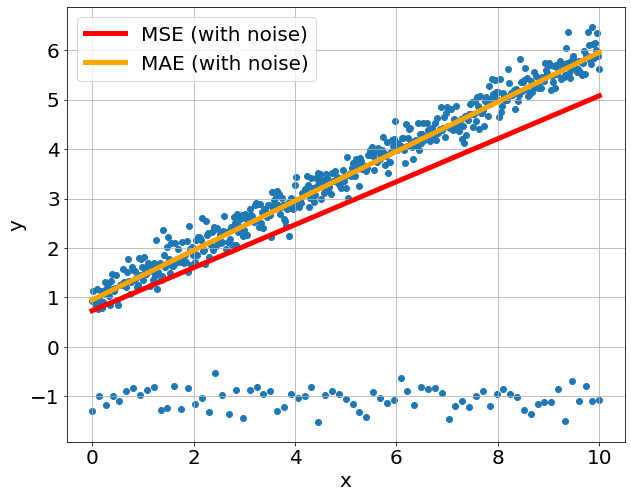

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_new, y_new)
plt.semilogy(x_new, res2.x[0]*x_new+res2.x[1], c = 'r', linewidth=5, label=r"MSE (with noise)")
plt.semilogy(x_new, res3.x[0]*x_new+res3.x[1], c = 'orange', linewidth=5, label=r"MAE (with noise)")
plt.xlabel(r"x", fontsize=20)
plt.ylabel(r"y", fontsize=20)
plt.grid()
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

Почему оптимизация MAE более устойчива к выбросам в данных, чем оптимизация MSE?